# Exercise-3
Add the specified code for each code cell, running the cells _in order_.

In this exercise you will be working with _images_, peforming some simple manipulations to change their appearance!

One effective Python libary for working with images is called [Pillow](http://pillow.readthedocs.io/en/4.1.x/handbook/overview.html), which is an update to the classic PIL (Python Imaging Library) module. This library comes with Anaconda, so should already be available on your machines. (See also it's [tutorial](http://pillow.readthedocs.io/en/4.1.x/handbook/tutorial.html)).

In particular, you will be working with the [Image](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html) module. Start by _importing_ the `Image` module from the `PIL` library.

In [1]:
from PIL import Image

You can then open an image using the `Image` module**'s** [`open()`](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.open) function, passing the (relative!) path to an image file to open.

Open the `img/husky_puppy.jpg` image and save it in a variable called **`my_image`**.

In [2]:
my_image = Image.open('img/husky_puppy.jpg')

It is possible to show the image you have openned in a few different ways. Calling the [`show()`](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.Image.show) method on an image will display it, but this method is slow (and may not work on all machines).

Instead, it is possible to display an image file (not necessarily one that you opened!) directly in Jupyter by utilizing the `IPython` library, as with the example below:

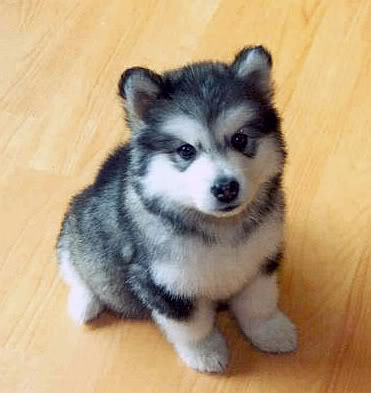

In [3]:
from IPython.display import Image as DisplayImage  # only need to import this once
DisplayImage('img/husky_puppy.jpg')  # this needs to be the last line of the cell

The `my_image` variable representing the image you opened has a number of properties that describe the image. For example, the [`size`](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.size) attribute returns a _tuple_ of the image's width and height. Assign the values of this tuple to distinct `width` and `height` variables. 

In [4]:
width, height = my_image.size

Images are represented by computers as 2-dimensional grids of colored points called [pixels](https://en.wikipedia.org/wiki/Pixel). Each pixel stores the color of the picture at that particular point in the grid. Computer colors are based on three components (or channels): a red component, a green component and a blue component. Each component is an integer with a value from 0 to 255 (1 byte). If all components are 0, the color ends up being black. If all components are 255, the color is white. Other combinations give other colors. You can see one example of how different channels combine [here](http://www.rapidtables.com/web/color/RGB_Color.htm). This method of specifying colors (there are other methods too!) is called 'RGB' for "red green blue".

With Pillow, pixels are represented as a triple (a **tuple** of length 3), with the each element in the tuple representing the _red_, _green_, and _blue_ components respectively.

Get a sequence of these pixel colors by calling the [`getdata()`](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.Image.getdata) function on your opened image, and save it in a variable **`pixel_list`**. You will need to [convert](https://docs.python.org/3/library/functions.html#func-list) the sequence into a _list_ in order to work with it. Print out the first element in this list of pixels to see an example of what color it is! (In the upper left corner it will be sort of brownish, meaning a high "red" channel but medium "blue" and "green" channels).
- Note that there are other, more efficient ways of manipulating these images with the Pillow library, but this process will let you practice with lists!

In [5]:
pixel_list = list(my_image.getdata())
print(pixel_list[0])

(228, 197, 151)


The list of pixel data Pillow provides is a _one-dimensional list_ (e.g., all of the pixels in the first row, followed by all of the pixels in the second row, etc). You can confirm this by printing the length of the `pixel_list`.

To make it easier to manipulate the images, you should create a new variable **`pixel_grid`** that is a _two-dimensional list_ (or _nested list_) of the pixels. The `pixel_grid` variable should be a list of "rows", where each "row" is a list of "pixels" (tuples).
- Use a loop to append each "row" of pixels to the `pixel_grid` list.
- **Hint**: there are `height` rows in the image. If each row was `200` pixels across, then the 0th row would be pixels 0 to 200 (not inclusive), the next would be 200 to400 (not inclusive)... with the ith row being pixels `i*width` to `(i+1)*width`.

In [6]:
pixel_grid = []
for i in range(height):
    pixel_grid.append( pixel_list[i*width:(i+1)*width] )  # watch the brackets!

Since we'll be doing multiple manipulations, we'll want to make a _copy_ of this nested list to modify, allowing us to keep the original intact (e.g., for comparisons). The simplest way to copy a two-dimensional list is to use the [`deepcopy()`](https://docs.python.org/3/library/copy.html#copy.deepcopy) method from the `copy` module. Import that method (once) and then copy the `pixel_grid` into a new variable **`grayscale_grid`**. 

In [7]:
from copy import deepcopy
grayscale_grid = deepcopy(pixel_grid)

Finally we can begin modifying the image. Start by creating a _grayscale_ version of the image. To do this, iterate through _each_ pixel in the `grayscale_grid` (you'll need a nested loop!). Change each pixel so the value of each of its red, green, and blue components are the **average** (as an integer) of the red, green, and blue components. That is, a pixel with color `(228, 197, 151)` should become a pixel with color `(192, 192, 192)`.

In [8]:
# grayscale
for i in range(height):  # row
    for j in range(width):  # col
        average = sum(pixel_grid[i][j])//3
        grayscale_grid[i][j] = (average, average, average)

Now to display the image! To do this using the `DisplayImage()` function from above, we'll need to first save the modified pixels to a new file. Since we'll do this repeatedly, abstract the work into a function!

Define a function **`save_new_image()`** that takes in two arguments: a two-dimensional grid of pixels, and the name of a file to save the image as. This function should perform the following steps:
1. Convert the two-dimensional grid back into a one-dimensional list ("flatten it"). Think about "adding" all of the rows together once after another to concatenate them. You can do this easily by using the built-in `sum()` function (be sure you specify what value the sum should "start" with&mdash;it's not the default of `0`!)
2. Create a new `Image` object by [copying](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.Image.copy) the original `my_image`. (You could also create a [new](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.new) image, but this is easier).
3. Use the [`putdata()`](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.Image.putdata) method to assign the "flattened" pixels to the image copy.
4. Use the [`save()`](http://pillow.readthedocs.io/en/4.1.x/reference/Image.html#PIL.Image.Image.save) method to save the copied image as the given filename.
5. Finally, **`return`** the result of calling the `DisplayImage()` function on that filename (this will allow you to display the new file in Jupyter).

In [9]:
def save_new_image(out_grid, filename):
    out_list = sum(out_grid, [])
    new_image = my_image.copy()
    new_image.putdata(out_list)
    new_image.save(filename)
    return DisplayImage(filename)

Call your `save_new_image()` function, passing it the `grayscale_grid` and saving the image as `img/grayscale.jpg`. This should cause the grayscale puppy to appear!

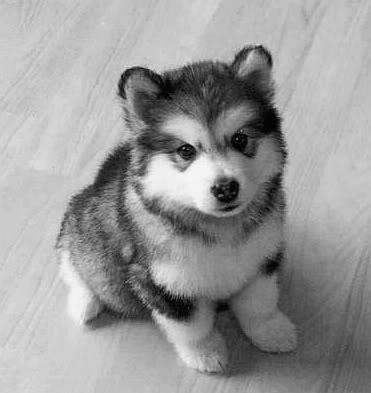

In [10]:
save_new_image(grayscale_grid,'img/grayscale.jpg')

Next, create a _new_ copy of the original `pixel_grid` and store it in a variable **`flipped_grid`**. Then modify that grid to flip the image upside down! Be sure and call `save_new_image()` when finished (save as a file `img/flipped.jpg`).
- To flip the image, take each pixel from the original image and put it in the corresponding place in the new image by giving it a new "row". Think about where each pixel needs to go in order to flip the image upside down&mdash;what math will you need to perform?
- Use another set of nested loops!

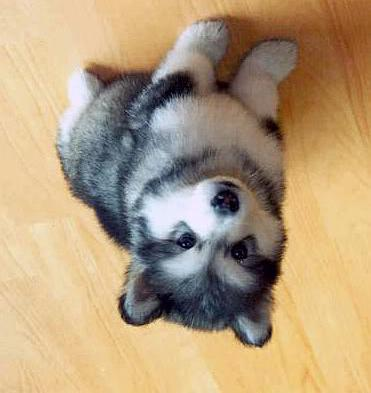

In [11]:
# flipped
flipped_grid = deepcopy(pixel_grid)

for i in range(height):  # row
    for j in range(width):  # col
        flipped_grid[i][j] = pixel_grid[height-i-1][j]

save_new_image(flipped_grid, 'img/flipped.jpg')

Next, create a _new_ copy of the original `pixel_grid` and store it in a variable **`negative_grid`**. Then modify that grid to produce a photographic "negative" of the image (with all the colors inverted). Be sure and call `save_new_image()` when finished (save as a file `img/negative.jpg`).
- In invert the colors, take each component and subtract it from `255` in order to get the "new" value of that component.
- Use those nested loops again!

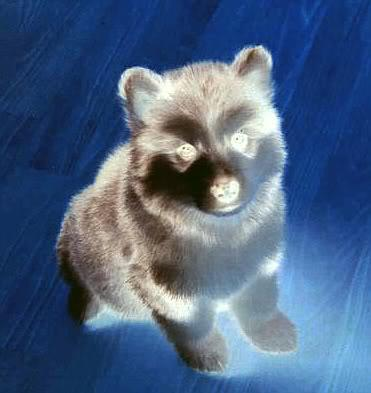

In [12]:
# negative
negative_grid = deepcopy(pixel_grid)

for i in range(height):  # row
    for j in range(width):  # col
        r,g,b = pixel_grid[i][j]  # get components
        negative_grid[i][j] = (255-r, 255-g, 255-b)

save_new_image(negative_grid, 'img/negative.jpg')